In [1]:
import pandas as pd
import joblib
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score
from pathlib import Path

# Set the checkpoint directory.
MODEL_CKPT_DIR = 'model_params_big_test'
# MODEL_CKPT_DIR = 'res_balanced_accuracy'
# MODEL_CKPT_DIR = 'res_f1'

# Paths to the saved model and scaler.
xgb_model_path = Path(MODEL_CKPT_DIR) / 'xgboost_model.json'
scaler_path = Path(MODEL_CKPT_DIR) / 'std_scaler.bin'

# Load the scaler and the pre-trained XGBoost model.
scaler = joblib.load(scaler_path)
model = xgb.XGBClassifier()
model.load_model(xgb_model_path)

In [3]:
MODEL_DATA_FILE = Path(MODEL_CKPT_DIR) / 'data.csv'

# > AVERAGE FILES HERE
# DATA_FILE = 'data/tables_OZ_geo_5500/processed/tabular_OZ_geo_5500.csv'
# DATA_FILE = 'data/tables_OZ_geo_5500/processed/tabular_OZ_geo_5500_all_query_pairs.csv'
# DATA_FILE = 'data/tables_OZ_geo_5500/processed/tabular_OZ_geo_5500_top-5_query_pairs.csv'

# > GOOD FILES HERE
# DATA_FILE = 'data/tables_OZ_geo_5500/processed/tabular_OZ_geo_5500_top-5_query-23_nonquery-5539_pairs.csv'
# DATA_FILE = 'data/tables_OZ_geo_5500/processed/tabular_OZ_geo_5500_top-5_query-23_nonquery-5539_embedded.csv'
# DATA_FILE = 'data/tables_OZ_geo_5500/processed/tabular_OZ_geo_5500_top-20_query-23_nonquery-5539_embedded.csv'
DATA_FILE = 'data/tables_OZ_geo_5500/processed/tabular_OZ_geo_5500_top-50_query-23_nonquery-5539_embedded.csv'
# DATA_FILE = 'data/tables_OZ_geo_5500/processed/tabular_OZ_geo_5500_top-50_query-23_nonquery-5539_pairs.csv'

# > FILES W/INNER RUCLIP AS RANKER
# DATA_FILE = 'data/tables_OZ_geo_5500/processed/tabular_OZ_geo_5500_top-30_query-2_nonquery-6_embedded.csv'
# DATA_FILE = 'data/tables_OZ_geo_5500/processed/tabular_OZ_geo_5500_top-20query-23_nonquery-5539_embedded_sbert=all-distilroberta-v1_clip=siamese_contrastive.pt.csv'
# DATA_FILE = 'data/tables_OZ_geo_5500/processed/tabular_OZ_geo_5500_top-20_query-2_nonquery-6_embedded_sbert=all-distilroberta-v1_clip=siamese_contrastive.pt_final-embs.csv'
# DATA_FILE = 'data/tables_OZ_geo_5500/processed/tabular_OZ_geo_5500_top-50_query-23_nonquery-5539_embedded_sbert=all-distilroberta-v1_clip=siamese_contrastive.pt_final-embs.csv'

df_all = pd.read_csv(DATA_FILE)
df_model = pd.read_csv(MODEL_DATA_FILE)
# df_all.columns.tolist()

In [17]:
pd.set_option('display.max_colwidth', None)

keywords = r'карта'
kw_mask = df_model.name_first.str.contains(keywords, case=False, regex=True)

df_model_domain = df_model[
    kw_mask

    # & (df_model.label == 1)
    # & (df_model.label == 0)
]

# display(df_model_subset[['name_first', 'name_second']])
for idx, row in df_model_domain.iterrows():
    print(row.name_first)
    print(row.sku_first)

    print(row.name_second)
    print(row.sku_second)
    print('-' * 50)
    print()

pd.reset_option('display.max_colwidth')

Географическая физическая карта Мира "Мир" 100х70 см
64354900
Карта мира настенная политическая интерактивная 101х70 см
30145426
--------------------------------------------------

Географическая физическая карта Мира "Мир" 100х70 см
64354900
Карта мира политическая настенная 101 х 69 см
55486657
--------------------------------------------------

Географическая физическая карта Мира "Мир" 100х70 см
64354900
Карта мира политическая географическая интерактивная
33206740
--------------------------------------------------

Географическая физическая карта Мира "Мир" 100х70 см
64354900
Физическая карта мира интерактивная, 101х66 см 
55488467
--------------------------------------------------

Географическая физическая карта Мира "Мир" 100х70 см
64354900
Карта мира географическая настенная для детей
147848541
--------------------------------------------------

Географическая физическая карта Мира "Мир" 100х70 см
64354900
Большая карта России на стену с городами скретч постер
36699878
-------

In [12]:
#@title plot_balance_distributions

# Visualize balance distribution by classes (0, 1) for first/second product with quantiles
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_balance_distributions(df_model):
    # Check if 'label' exists in df_model
    if 'label' in df_model.columns:
        # Create a figure with 2 subplots side by side
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        # Plot balance_first distribution by class with quantiles, without outliers
        sns.boxplot(x='label', y='balance_first', data=df_model, ax=axes[0], 
                    showfliers=False, whis=[5, 90], showmeans=True, 
                    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
        
        # # Add quantile lines for balance_first
        # for label in df_model['label'].unique():
        #     quantiles = df_model[df_model['label'] == label]['balance_first'].quantile([0.25, 0.5, 0.75]).values
        #     for i, q in enumerate(quantiles):
        #         axes[0].axhline(y=q, color='r', linestyle='--', alpha=0.3)
        
        axes[0].set_title('Balance Distribution (First Product) by Class')
        axes[0].set_xlabel('Class (0: Not Similar, 1: Similar)')
        axes[0].set_ylabel('Balance')
        
        # Plot balance_second distribution by class with quantiles, without outliers
        sns.boxplot(x='label', y='balance_second', data=df_model, ax=axes[1], 
                    showfliers=False, whis=[5, 90], showmeans=True,
                    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
        
        # # Add quantile lines for balance_second
        # for label in df_model['label'].unique():
        #     quantiles = df_model[df_model['label'] == label]['balance_second'].quantile([0.25, 0.5, 0.75]).values
        #     for i, q in enumerate(quantiles):
        #         axes[1].axhline(y=q, color='r', linestyle='--', alpha=0.3)
        
        axes[1].set_title('Balance Distribution (Second Product) by Class')
        axes[1].set_xlabel('Class (0: Not Similar, 1: Similar)')
        axes[1].set_ylabel('Balance')
        
        plt.tight_layout()
        plt.show()
        
        # Print detailed quantile statistics
        print("Quantile statistics for balance_first by class:")
        quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
        display(df_model.groupby('label')['balance_first'].quantile(quantiles).unstack())
        
        print("\nQuantile statistics for balance_second by class:")
        display(df_model.groupby('label')['balance_second'].quantile(quantiles).unstack())
    else:
        print("Label column not found in the dataset")

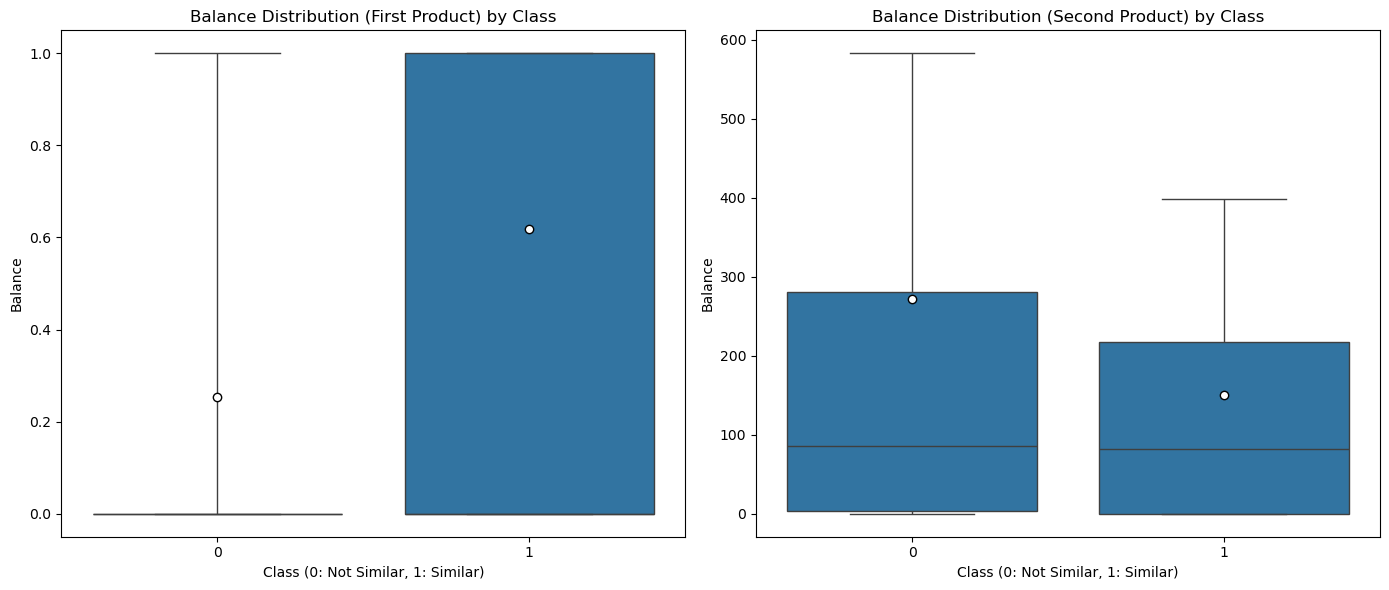

Quantile statistics for balance_first by class:


,0.10,0.25,0.50,0.75,0.90
label,,,,,
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0



Quantile statistics for balance_second by class:


,0.10,0.25,0.50,0.75,0.90
label,,,,,
0,0.0,3.0,86.0,281.00,583.0
1,0.0,0.0,81.5,217.25,443.0


In [13]:
plot_balance_distributions(
    # df_model,
    df_model_domain,
)

# Run inference

In [14]:
# Choose the dataset to use for inference.

df_chosen_all = df_all
# df_chosen_all = df_model
# df_chosen_all = df_model_domain

In [15]:
N_SKU = 23

df_chosen_all = df_chosen_all.drop(df_chosen_all[df_chosen_all['sku_first'] == df_chosen_all['sku_second']].index)

all_sku = df_chosen_all.sku_first.unique()
subset_sku = pd.Series(all_sku)\
    .sample(min(N_SKU, len(all_sku)), random_state=42).tolist()
df = (
    df_chosen_all[df_chosen_all['sku_first'].isin(subset_sku)]
)

print(f'Total Query SKU: {df.sku_first.nunique()}/{df_chosen_all.sku_first.nunique()}')
print(f'Total columns: {len(df.columns)}')

Total Query SKU: 23/23
Total columns: 35


In [59]:
# SCALE FEATURES

# Separate the true labels from the dataset.
if 'label' in df.columns:
    y_true = df['label']

# Define the columns that were not used as features during training.
columns_to_drop = [
    'sku_first', 'sku_second',
    'name_first', 'description_first',
    'name_second', 'description_second',
    'options_first', 'options_second',
    'image_url_first', 'image_url_second',
    'image_id_first', 'image_id_second',
    'label'
]

# Create a DataFrame for scaling by dropping the extra columns.
# The original df remains unchanged.
X = df.drop(columns=columns_to_drop, errors='ignore')

# Ensure the columns match exactly what the scaler was trained on.
# The scaler's attribute 'feature_names_in_' holds the expected column names.
if hasattr(scaler, 'feature_names_in_'):
    expected_features = list(scaler.feature_names_in_)
    X_for_scaler = X[expected_features]
else:
    X_for_scaler = X

# Store feature names for later use with SHAP
model.feature_names = X_for_scaler.columns.tolist()

# print("Columns used for scaling:", X_for_scaler.columns.tolist())

# Scale the features using the loaded scaler.
X_scaled = scaler.transform(X_for_scaler)

In [60]:
# Compute predictions

import pandas as pd

# Compute predictions and probabilities (using your pre-trained model)
predictions = model.predict(X_scaled)
predicted_probas = model.predict_proba(X_scaled)

# For binary classification, use the positive class probability;
# for multiclass, use the highest probability of any class.
if predicted_probas.shape[1] == 2:
    sort_probas = predicted_probas[:, 1]
else:
    sort_probas = predicted_probas.max(axis=1)

# Create a DataFrame with the predictions and probabilities.
# We align by the original dataframe's index.
results_df = pd.DataFrame({
    'prediction': predictions,
    'proba': sort_probas
}, index=df.index)

# Concatenate the predictions to the original DataFrame.
df_with_preds = pd.concat([df, results_df], axis=1)

# Instead of using groupby.apply (with include_groups), sort directly:
df_grouped_sorted = df_with_preds.sort_values(
    by=['sku_first', 'proba'], ascending=[True, False]
)

print("Data grouped by sku_first and sorted within each group by probability:")
df_grouped_sorted.columns.tolist()

matches_df = df_grouped_sorted.copy()
matches_df['price_delta_abs'] = matches_df['final_price_first'] - matches_df['final_price_second']
matches_df['price_delta_rel'] = (
    (matches_df['final_price_first'] - matches_df['final_price_second'])
    / matches_df['final_price_first']
).abs()

matches_df = matches_df[matches_df.prediction == 1]

if 'url_first' in matches_df.columns:
    matches_df_short = matches_df[[
        'sku_first', 'sku_second', 'prediction', 'proba',
        'url_first', 'url_second'
    ]]
else:
    matches_df_short = matches_df[[
        'sku_first', 'sku_second', 'prediction', 'proba',
    ]]

matches_df_short.head()

Data grouped by sku_first and sorted within each group by probability:


,sku_first,sku_second,prediction,proba,url_first,url_second
300,491268805,1573965314,1,0.915313,https://www.ozon.ru/context/detail/id/491268805/,https://www.ozon.ru/context/detail/id/1573965314/
305,491268805,1674617748,1,0.847642,https://www.ozon.ru/context/detail/id/491268805/,https://www.ozon.ru/context/detail/id/1674617748/
301,491268805,1574052518,1,0.839449,https://www.ozon.ru/context/detail/id/491268805/,https://www.ozon.ru/context/detail/id/1574052518/
320,491268805,484538633,1,0.819736,https://www.ozon.ru/context/detail/id/491268805/,https://www.ozon.ru/context/detail/id/484538633/
319,491268805,601310061,1,0.819248,https://www.ozon.ru/context/detail/id/491268805/,https://www.ozon.ru/context/detail/id/601310061/


In [61]:
# Calculate accuracy metrics
if 'label' in df.columns:
    # Overall accuracy
    accuracy = (matches_df['prediction'] == matches_df['label']).mean()
    print(f"\nOverall accuracy: {accuracy:.4f}")
    
    # Precision, recall, f1-score
    from sklearn.metrics import classification_report
    print("\nDetailed classification report:")
    print(classification_report(matches_df['label'], matches_df['prediction']))
    
    # Plot confusion matrix
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    
    cm = confusion_matrix(matches_df['label'], matches_df['prediction'])
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


In [68]:
#@title print_samples
import shap
import matplotlib.pyplot as plt
import numpy as np

def print_samples(
    top_k=5,
    display_stats=False,
    display_name=False,
    display_shap=False,  # Flag to control SHAP explanation display
    agg_waterfall=True,  # Whether to show initial aggregated waterfall
    waterfalls=False,    # Whether to show individual waterfalls
    shap_values=False    # Whether to print detailed top SHAP values report
):
    # Load the model and explainer if SHAP is enabled
    if display_shap:
        # Check booster type to determine which explainer to use
        booster_type = model.get_xgb_params().get("booster")
        
        if booster_type == "gblinear":
            # Use LinearExplainer for linear models with proper masker
            # Create a background dataset for the masker
            sample_size = min(100, len(matches_df))
            background_data = matches_df[model.feature_names].sample(n=sample_size, random_state=42)
            # Scale the background data
            background_data_scaled = pd.DataFrame(
                scaler.transform(background_data),
                columns=model.feature_names  # Add feature names to the scaled data
            )
            # Create an Independent masker with the background data
            masker = shap.maskers.Independent(background_data_scaled)
            explainer = shap.LinearExplainer(model, masker)
        else:
            # Use TreeExplainer for tree-based models
            explainer = shap.TreeExplainer(model)
        
        # Create an aggregated waterfall plot for the entire dataset
        if agg_waterfall:
            # Sample a subset of data for the summary plot
            sample_size = min(100, len(matches_df))
            sample_df = matches_df.sample(n=sample_size, random_state=42)
            
            # Get features for the sample
            sample_features = sample_df[model.feature_names]
            
            # Scale features
            scaled_sample_features = pd.DataFrame(
                scaler.transform(sample_features),
                columns=model.feature_names  # Add feature names to the scaled data
            )
            
            # Calculate SHAP values for the sample
            shap_values_agg = explainer.shap_values(scaled_sample_features)
            
            # For binary classification, get values for positive class
            if isinstance(shap_values_agg, list):
                shap_values_agg = shap_values_agg[1]
            
            plt.figure(figsize=(10, 8))
            shap.summary_plot(
                shap_values_agg,
                scaled_sample_features,
                feature_names=model.feature_names,
                show=False  # <--- Turn off auto-show
            )
            plt.title("Aggregated Feature Importance")
            plt.tight_layout()
            plt.show()  # <--- Show the finalized figure

    for query_idx, (query_sku, query_df) in enumerate(matches_df.groupby('sku_first')):
        print(f'Query #{query_idx} '+'#' * 40)
        print(f"Query SKU: {query_sku}")
        if 'url_first' in query_df.columns:
            print(f'Query URL: {query_df["url_first"].iloc[0]}')

        if display_name:
            print(f"Query Name: {query_df['name_first'].iloc[0]}")
            # print(f"Query Description: {query_df['description_first'].iloc[0]}")

        if display_stats:
            display(query_df[[
                'balance_first',
                'comments_first',
                'rating_first',
                'comments_first'
            ]].iloc[0].to_frame().T)

        print('-' * 60)
        for top_k_idx, row in query_df.reset_index(drop=True).iterrows():
            if top_k_idx == top_k-1:
                break
            print(f"Top-{top_k_idx} SKU: {row['sku_second']}")
            if 'url_second' in row:
                print(f'Top-{top_k_idx} URL: {row["url_second"]}')
            print(f"Match probability: {row['proba']:.4f}")

            if display_name:
                print(f'Top-{top_k_idx} Name: {row["name_second"]}')
                # print(f'Top-{top_k_idx} Description: {row['description_second']}')

            if display_stats:
                display(row[['balance_second',
                            'comments_second',
                            'rating_second',
                            'comments_second'
                            ]].to_frame().T)
            
            # Display SHAP explanation for this prediction
            if display_shap:
                # Get the feature values for this pair
                features = row[model.feature_names].to_frame().T
                
                # Scale features using the same scaler used during training
                scaled_features = pd.DataFrame(
                    scaler.transform(features),
                    columns=model.feature_names  # Add feature names to the scaled data
                )
                
                # Calculate SHAP values using scaled features
                shap_values_row = explainer.shap_values(scaled_features)
                
                # For binary classification, get values for positive class
                if isinstance(shap_values_row, list):
                    shap_values_row = shap_values_row[1]
                
                # Get expected value (base value)
                expected_value = explainer.expected_value
                if isinstance(expected_value, list):
                    expected_value = expected_value[1]
                
                if shap_values:
                    # Display summary of top contributing features
                    top_features = pd.DataFrame({
                        'Feature': model.feature_names,
                        'SHAP Value': shap_values_row[0],
                        'Feature Value': features.values[0],
                        'Scaled Value': scaled_features.values[0]
                    }).sort_values(by='SHAP Value', key=abs, ascending=False).head(5)
                    
                    print("\nTop contributing features:")
                    for i, (_, feat) in enumerate(top_features.iterrows()):
                        impact = "+" if feat['SHAP Value'] > 0 else ""
                        print(f"  {i+1}. {feat['Feature']} = {feat['Feature Value']:.4f} (scaled: {feat['Scaled Value']:.4f}, impact: {impact}{feat['SHAP Value']:.4f})")
                    
                    # Fix for DeprecationWarning - properly extract scalar value from numpy array
                    expected_value_float = expected_value.item() if isinstance(expected_value, np.ndarray) else expected_value
                    
                    print(f"\nBase value: {expected_value_float:.4f}")
                    print(f"Sum of SHAP values: {shap_values_row[0].sum():.4f}")
                    print(f"Final prediction: {expected_value_float + shap_values_row[0].sum():.4f}")
                    print(f"Probability (sigmoid): {1/(1+np.exp(-(expected_value_float + shap_values_row[0].sum()))):.4f}")
                    # Print model's raw probability prediction
                    raw_proba = model.predict_proba(scaled_features)
                    print(f"\nModel predict_proba output: {raw_proba[0]}")
                    print(f"Positive class probability: {raw_proba[0][1]:.4f}")
                
                # Add waterfall plot
                if waterfalls:
                    # Fix for DeprecationWarning - properly extract scalar value from numpy array
                    expected_value_float = expected_value.item() if isinstance(expected_value, np.ndarray) else expected_value
                    
                    plt.figure(figsize=(10, 6))
                    shap.plots.waterfall(shap.Explanation(
                        values=shap_values_row[0],
                        base_values=expected_value_float,
                        data=scaled_features.values[0],
                        feature_names=model.feature_names
                    ), max_display=10, show=True)
            
            print()
            
        print()

    # TODO: исключить карты, которые не в наличии?
# print_samples()

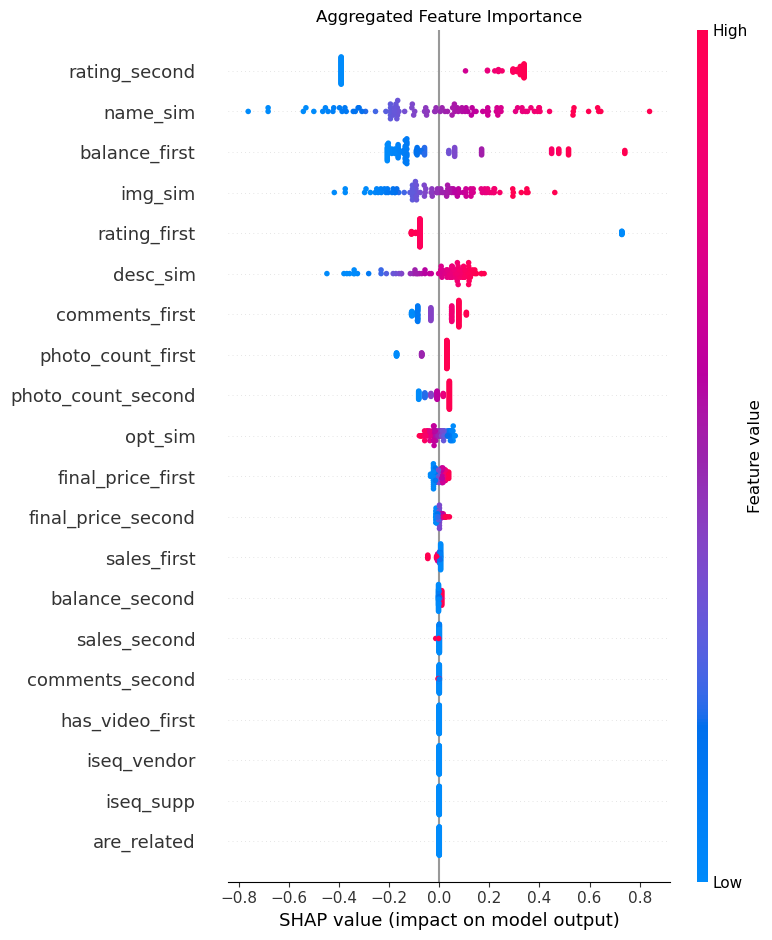

In [ ]:
print_samples(
    # display_stats=True,
    # display_name=True,
    display_shap=True,  # Flag to control SHAP explanation display
    # agg_waterfall=True,  # Whether to show initial aggregated waterfall
    # waterfalls=True,    # Whether to show individual waterfalls
    # shap_values=False    # Whether to print detailed top SHAP values report
)

In [11]:
def construct_wide_table(df, top_k):
    """
    Constructs a wide table such that each row corresponds to a unique query SKU and contains:
    
      Query_SKU, Top-1_SKU, Top-2_SKU, ... Top-k_SKU,
      Query_URL, Top-1_URL, Top-2_URL, ... Top-k_URL,
      Top-1_Proba, Top-2_Proba, ... Top-k_Proba
      
    Only candidates with a positive prediction (prediction == 1) are included.
    If there are fewer than top_k positive predictions for a query, the remaining columns are filled with None.
    """
    wide_rows = []
    # Process each unique query SKU.
    for query_sku, group in df.groupby('sku_first'):
        # Consider only candidates with positive prediction.
        group_positive = group[group['prediction'] == 1]
        # Sort the positive candidates by probability in descending order.
        group_sorted = group_positive.sort_values(by='proba', ascending=False).reset_index(drop=True)
        # Assume the query URL is the same for every row with the same query SKU.
        query_url = group_sorted.loc[0, 'url_first'] if not group_sorted.empty else None
        
        # Build the row dictionary with the desired column order.
        row = {}
        row['Query_SKU'] = query_sku
        
        # Add candidate SKU columns.
        for i in range(top_k):
            if i < len(group_sorted):
                row[f'Top-{i+1}_SKU'] = group_sorted.loc[i, 'sku_second']
            else:
                row[f'Top-{i+1}_SKU'] = None
        
        # Add the Query URL.
        row['Query_URL'] = query_url
        
        # Add candidate URL columns.
        for i in range(top_k):
            if i < len(group_sorted):
                row[f'Top-{i+1}_URL'] = group_sorted.loc[i, 'url_second']
            else:
                row[f'Top-{i+1}_URL'] = None
        
        # Add candidate probability columns.
        for i in range(top_k):
            if i < len(group_sorted):
                row[f'Top-{i+1}_proba'] = group_sorted.loc[i, 'proba']
            else:
                row[f'Top-{i+1}_proba'] = None
        
        wide_rows.append(row)
    return pd.DataFrame(wide_rows)


Generating aggregated SHAP violin plot...


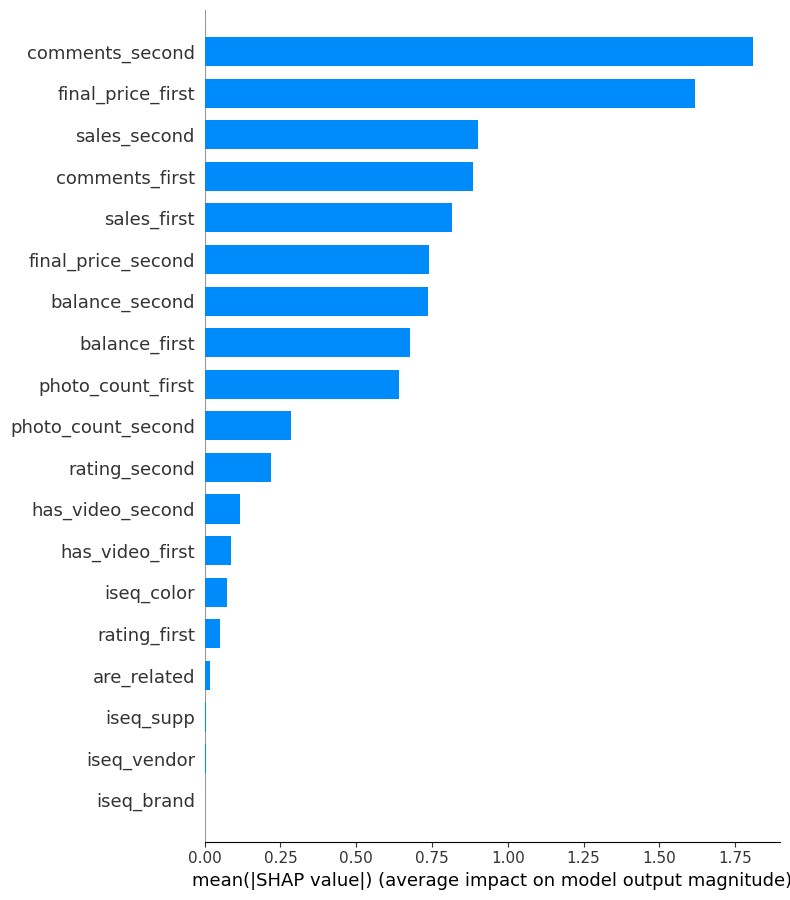

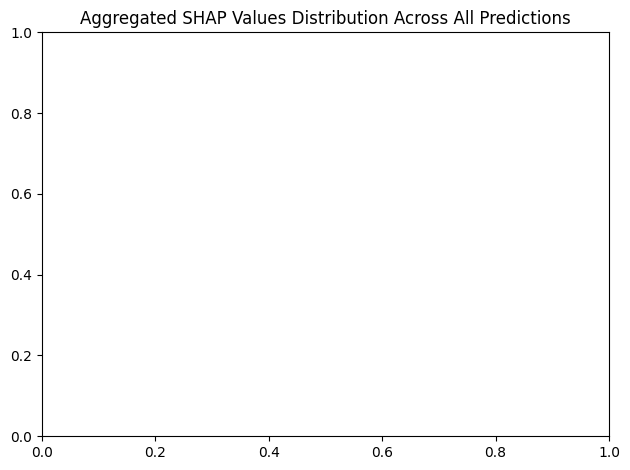

In [ ]:
# Create SHAP explainer and aggregated violin plot
print("Generating aggregated SHAP violin plot...")

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)

# Get feature values for all pairs and ensure they are float type
features = matches_df[model.feature_names].values.astype(float)

# Calculate SHAP values for all predictions
shap_values = explainer.shap_values(features)

# For binary classification, get values for positive class
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# Create violin plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, features, feature_names=model.feature_names, plot_type="bar")  # Changed to bar plot
plt.title("Aggregated SHAP Values Distribution Across All Predictions")
plt.tight_layout()
plt.show()

In [12]:
# --- Set your desired top_k (e.g. 5) and construct the wide table.
TOP_K = 5

matches_wide_df = construct_wide_table(df_grouped_sorted, TOP_K)
matches_wide_df = matches_wide_df.dropna()
matches_wide_df

,Query_SKU,Top-1_SKU,Top-2_SKU,Top-3_SKU,Top-4_SKU,Top-5_SKU,Query_URL,Top-1_URL,Top-2_URL,Top-3_URL,Top-4_URL,Top-5_URL,Top-1_proba,Top-2_proba,Top-3_proba,Top-4_proba,Top-5_proba
0,491268805,8.579687e+08,8.537719e+08,8.569854e+08,8.544034e+08,8.538313e+08,https://www.ozon.ru/context/detail/id/491268805/,https://www.ozon.ru/context/detail/id/857968654/,https://www.ozon.ru/context/detail/id/853771898/,https://www.ozon.ru/context/detail/id/856985388/,https://www.ozon.ru/context/detail/id/854403374/,https://www.ozon.ru/context/detail/id/853831334/,0.985831,0.984913,0.984800,0.975333,0.973358
2,491270369,1.919437e+09,1.421566e+09,6.468883e+08,1.787263e+08,6.469077e+08,https://www.ozon.ru/context/detail/id/491270369/,https://www.ozon.ru/context/detail/id/1919437475/,https://www.ozon.ru/context/detail/id/1421565737/,https://www.ozon.ru/context/detail/id/646888301/,https://www.ozon.ru/context/detail/id/178726257/,https://www.ozon.ru/context/detail/id/646907736/,0.704000,0.620349,0.560837,0.516669,0.516117
3,491271284,1.421560e+09,1.421566e+09,8.652861e+08,4.708702e+08,6.712113e+08,https://www.ozon.ru/context/detail/id/491271284/,https://www.ozon.ru/context/detail/id/1421559792/,https://www.ozon.ru/context/detail/id/1421565737/,https://www.ozon.ru/context/detail/id/865286119/,https://www.ozon.ru/context/detail/id/470870231/,https://www.ozon.ru/context/detail/id/671211267/,0.828432,0.804022,0.799381,0.765026,0.701680
5,491271339,7.654523e+08,1.635104e+09,1.011787e+09,3.766690e+08,4.176194e+08,https://www.ozon.ru/context/detail/id/491271339/,https://www.ozon.ru/context/detail/id/765452251/,https://www.ozon.ru/context/detail/id/1635104278/,https://www.ozon.ru/context/detail/id/1011787050/,https://www.ozon.ru/context/detail/id/376669001/,https://www.ozon.ru/context/detail/id/417619369/,0.956154,0.948914,0.930448,0.921222,0.920474
6,491271768,8.538313e+08,8.544034e+08,8.579687e+08,8.569854e+08,1.629024e+09,https://www.ozon.ru/context/detail/id/491271768/,https://www.ozon.ru/context/detail/id/853831334/,https://www.ozon.ru/context/detail/id/854403374/,https://www.ozon.ru/context/detail/id/857968654/,https://www.ozon.ru/context/detail/id/856985388/,https://www.ozon.ru/context/detail/id/1629023767/,0.949865,0.901499,0.891754,0.890374,0.826007
8,491273791,1.598284e+09,1.787263e+08,1.919437e+09,4.906860e+08,6.015567e+08,https://www.ozon.ru/context/detail/id/491273791/,https://www.ozon.ru/context/detail/id/1598283510/,https://www.ozon.ru/context/detail/id/178726257/,https://www.ozon.ru/context/detail/id/1919437475/,https://www.ozon.ru/context/detail/id/490685952/,https://www.ozon.ru/context/detail/id/601556709/,0.977719,0.943675,0.852875,0.763934,0.724084
10,492260072,1.408330e+09,8.538045e+08,8.569854e+08,8.538313e+08,1.573132e+09,https://www.ozon.ru/context/detail/id/492260072/,https://www.ozon.ru/context/detail/id/1408330333/,https://www.ozon.ru/context/detail/id/853804528/,https://www.ozon.ru/context/detail/id/856985388/,https://www.ozon.ru/context/detail/id/853831334/,https://www.ozon.ru/context/detail/id/1573132450/,0.986067,0.975680,0.962779,0.932112,0.829408
12,507113963,1.030259e+09,1.449502e+09,1.449500e+09,1.030260e+09,1.030310e+09,https://www.ozon.ru/context/detail/id/507113963/,https://www.ozon.ru/context/detail/id/1030259077/,https://www.ozon.ru/context/detail/id/1449501817/,https://www.ozon.ru/context/detail/id/1449500440/,https://www.ozon.ru/context/detail/id/1030259834/,https://www.ozon.ru/context/detail/id/1030309559/,0.987020,0.975414,0.975414,0.975414,0.960574
16,922229770,4.661462e+08,1.320622e+09,4.673773e+08,1.544672e+09,1.633444e+09,https://www.ozon.ru/context/detail/id/922229770/,https://www.ozon.ru/context/detail/id/466146204/,https://www.ozon.ru/context/detail/id/1320622328/,https://www.ozon.ru/context/detail/id/467377269/,https://www.ozon.ru/context/detail/id/1544672427/,https://www.ozon.ru/context/detail/id/1633443740/,0.982346,0.953258,0.947267,0.946289,0.946289
18,922230517,6.712113e+08,9.742945e+08,6.712113e+08,9

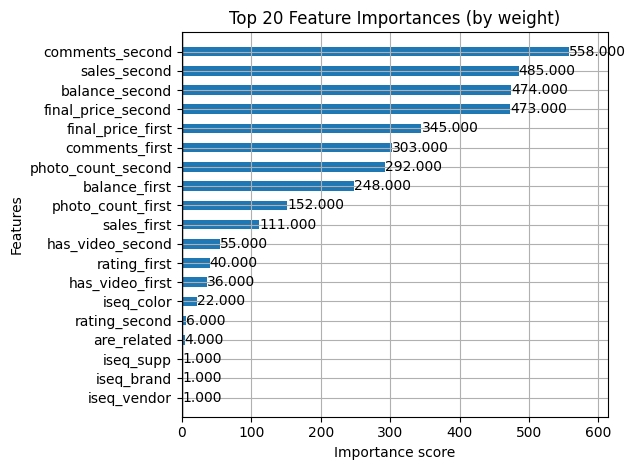

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assume you already have a scaler and a DataFrame X_for_scaler that were used during training.
# For example, earlier you may have extracted:
# if hasattr(scaler, 'feature_names_in_'):
#     feature_names = list(scaler.feature_names_in_)
# else:
#     feature_names = X_for_scaler.columns.tolist()

if hasattr(scaler, 'feature_names_in_'):
    feature_names = list(scaler.feature_names_in_)
else:
    feature_names = X_for_scaler.columns.tolist()

# Set the original feature names in the booster
booster = model.get_booster()
booster.feature_names = feature_names

# Now plot the feature importance using the booster (which now has the correct names)
ax = xgb.plot_importance(
    booster,
    importance_type='weight',
    max_num_features=20,
    height=0.5,
    show_values=False  # Turn off default text; we'll annotate manually.
)

plt.title("Top 20 Feature Importances (by weight)")
# Optional: Draw a vertical line at x=0 for clarity when some weights are negative.
plt.axvline(x=0, color='black', linewidth=1)

# Label each bar manually so they're formatted nicely.
offset = 0.02  # This offset shifts the label a little to the right.
for patch in ax.patches:
    bar_width = patch.get_width()
    bar_y_center = patch.get_y() + patch.get_height() / 2
    # For positive values, label at the bar's end; for negative, anchor at x=0.
    label_x = bar_width + offset if bar_width >= 0 else 0 + offset
    ax.text(label_x, bar_y_center, f"{bar_width:.3f}", ha='left', va='center')

plt.tight_layout()
plt.show()


# Output files

In [13]:
# subset_cols = [
#     'Query_SKU',
#     # 'Top-1_SKU', 'Top-2_SKU', 'Top-3_SKU', 'Top-4_SKU', 'Top-5_SKU',
#     # 'Query_URL',
#     # 'Top-1_URL', 'Top-2_URL', 'Top-3_URL', 'Top-4_URL', 'Top-5_URL',
#     # 'Top-1_proba', 'Top-2_proba', 'Top-3_proba', 'Top-4_proba', 'Top-5_proba'
# ]

# output_file_path = (
#     Path(DATA_FILE).parent /
#     Path('test_results') / 
#     'result-errors-template.csv'
#     # (f'result-errors-template-{MODEL_CKPT_DIR}_' + Path(DATA_FILE).name)
# )
# matches_wide_df.to_clipboard(index=False, header=True, excel=True, columns=subset_cols)
# matches_wide_df.to_csv(output_file_path, index=False, header=True, columns=subset_cols)

In [14]:
# DATA_PATH = 'data'

# output_file_path = (
#     Path(DATA_FILE).parent /
#     Path('test_results') / 
#     (f'result-{MODEL_CKPT_DIR}_' + Path(DATA_FILE).name)
# )
# output_file_path.parent.mkdir(parents=True, exist_ok=True)
# # output_file_path

# matches_wide_df.to_csv(output_file_path, index=None)